In [2]:
import sys
import pandas as pd
from Bio.Seq import Seq
import re

In [9]:
filename = "/Users/claireleblanc/Downloads/Data/pm_gcn4_sort2_pools_allchannels.csv"

file = pd.read_csv(filename, index_col=0)

prot_seq = [str(Seq(seq).translate()) for seq in file["ArrayDNA"]]

activity = (file["Activity_gfpA"]  + file["Activity_gfpB"]) / 2
activity.fillna(file["Activity_gfpB"], inplace=True)
activity.fillna(file["Activity_gfpA"], inplace=True) 

abundance = (file["Activity_cherryA"]  + file["Activity_cherryB"]) / 2
abundance.fillna(file["Activity_cherryB"], inplace=True)
abundance.fillna(file["Activity_cherryA"], inplace=True)

In [11]:
file["Sequence"] = prot_seq
file

,ArrayDNA,Activity_ratioA,Activity_ratioB,Activity_gfpA,Activity_gfpB,Activity_cherryA,Activity_cherryB,Sequence
0,TTGCAAGACTTTGTCTTGTTTGATCAACCAATTAGACCACATAGAC...,22525.552089,24886.391672,285.000000,256.000000,2659.430019,1890.884474,LQDFVLFDQPIRPHRQHNRNALQPPTRGINLNQQHRSQHL
1,GATTTGTTTGGTGGTTTGGAATCTTCTACTCCATGGATTAGAGAAC...,7965.856073,NaN,478.640464,NaN,4281.992228,NaN,DLFGGLESSTPWIREQERIHLQYVEGLRWVTWGQMGHVEL
2,GTTGAACATTCTCCAGCTGAGAAATCTGATGATTTGGAAGTTGTTG...,18161.451312,NaN,1081.420642,NaN,3180.013344,NaN,VEHSPAEKSDDLEVVEPTSGHQRRKSGTSPPSGRHSSVSG
3,AATGCTGGTACTGCTTCTAGATTCTTGACTACTGTTGTTGCTTTGT...,52119.378755,NaN,603.933187,NaN,1160.105019,NaN,NAGTASRFLTTVVALCSPSDVSSTVLTGNARMQVRPIGPL
4,CAACAACAACATAGACCACATTCTACTTTGCAAGCTTCTTCTGCTT...,17677.065802,20412.277191,491.493342,360.396866,3247.285818,3024.948139,QQQHRPHSTLQASSASPIQNPRVSDLSQDTGSIASSTSPQ
...,...,...,...,...,...,...,...,...
18960,GATTTGTCTACTCCATCATTTGAATCTCCAGGTAACTTCTCTCAGA...,NaN,NaN,NaN,NaN,NaN,4649.000000,DLSTPSFESPGNFSQNTSPMFTDLDVAGHEDWPSLFDHSS
18961,GACTTTGATGGTGCTGCTGATCCATGGTTTCCATTGTTTCCACAAG...,NaN,NaN,NaN,NaN,NaN,4649.000000,DFDGAADPWFPLFPQDNNVAPAQPTSVENSPELKSDEVDS
18962,TGTGATACTGTTGAAGGTCAAAGAGCTGTTATGAATAAATGTTATT...,NaN,NaN,NaN,NaN,NaN,4649.000000,CDTVEGQRAVMNKCYCRTDLQSLGQSYLTTCVSTNCNQIG
18963,AAACCAAATTCTATTGCTAAGAACTTTCATCAACATCATGGTAATG...,NaN,NaN,NaN,NaN,NaN,4649.000000,KPNSIAKNFHQHHGNDDESRLDHLGVVAYNRKQRSIPLSP


In [27]:
file_A = file[["Sequence","Activity_gfpA","Activity_cherryA"]].dropna()
file_B = file[["Sequence","Activity_gfpB","Activity_cherryB"]].dropna()

Text(0, 0.5, 'Abundance')

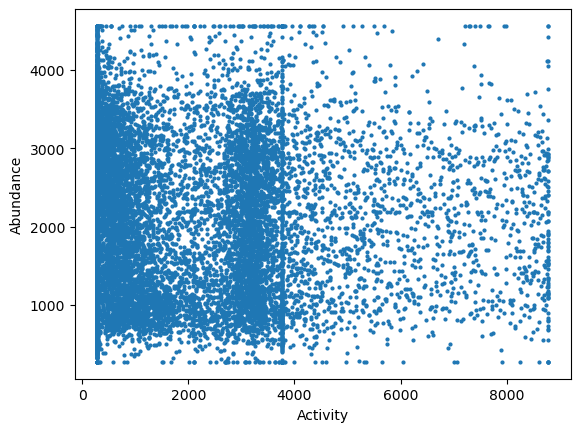

In [26]:
import matplotlib.pyplot as plt
plt.scatter(file_A["Activity_gfpA"],file_A["Activity_cherryA"], s=4)
plt.xlabel("Activity")
plt.ylabel("Abundance")

Text(0, 0.5, 'Abundance')

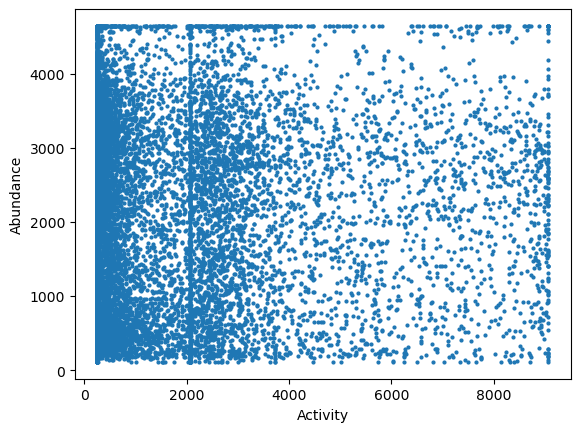

In [28]:
plt.scatter(file_B["Activity_gfpB"],file_B["Activity_cherryB"], s=4)
plt.xlabel("Activity")
plt.ylabel("Abundance")

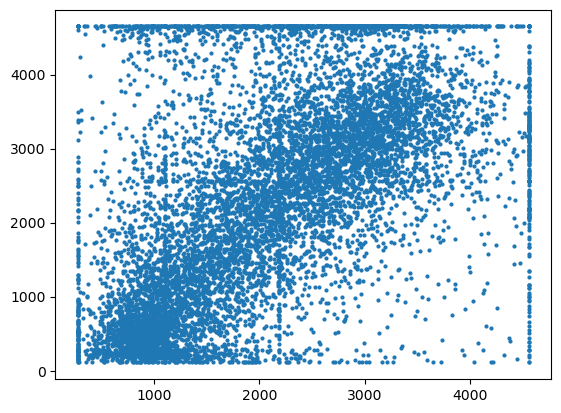

In [30]:
plt.scatter(file["Activity_cherryA"], file["Activity_cherryB"],s=4)

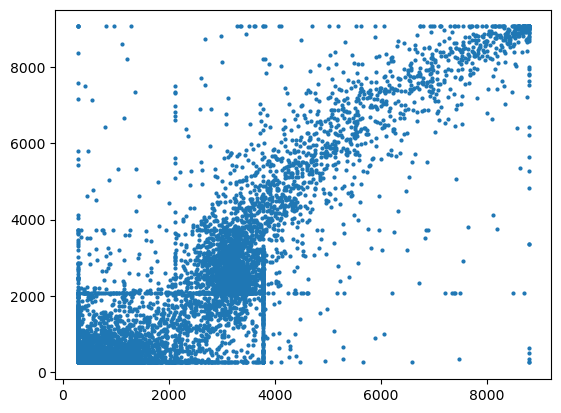

In [31]:
plt.scatter(file["Activity_gfpA"], file["Activity_gfpB"],s=4)

In [104]:
import re
r1 = re.compile("(A|V|L|I|M|F|Y|W)$")
file["hydrophobic_end"] = [True if r1.search(seq) else False for seq in file["Sequence"]]

r2 = re.compile("(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)$")
file["hydrophobic_2end"] = [True if r2.search(seq) else False for seq in file["Sequence"]]

r3 = re.compile("(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)$")
file["hydrophobic_3end"] = [True if r3.search(seq) else False for seq in file["Sequence"]]

r1 = re.compile("^(A|V|L|I|M|F|Y|W)")
file["hydrophobic_start"] = [True if r1.search(seq) else False for seq in file["Sequence"]]

r2 = re.compile("^(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)")
file["hydrophobic_2start"] = [True if r2.search(seq) else False for seq in file["Sequence"]]

r3 = re.compile("^(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)")
file["hydrophobic_3start"] = [True if r3.search(seq) else False for seq in file["Sequence"]]

r1 = re.compile("(A|V|L|I|M|F|Y|W)")
file["hydrophobic_anywhere"] = [True if r1.search(seq) else False for seq in file["Sequence"]]

r2 = re.compile("(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)")
file["hydrophobic_2anywhere"] = [True if r2.search(seq) else False for seq in file["Sequence"]]

r3 = re.compile("(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)")
file["hydrophobic_3anywhere"] = [True if r3.search(seq) else False for seq in file["Sequence"]]

In [106]:
import re
r1 = re.compile("(A|V|L|I|M|F|Y|W)$")
file["hydrophobic_end"] = [True if r1.search(seq) else False for seq in file["Sequence"]]

r2 = re.compile("(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)$")
file["hydrophobic_2end"] = [True if r2.search(seq) else False for seq in file["Sequence"]]

r3 = re.compile("(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)$")
file["hydrophobic_3end"] = [True if r3.search(seq) else False for seq in file["Sequence"]]

r1 = re.compile("^(A|V|L|I|M|F|Y|W)")
file["hydrophobic_start"] = [True if r1.search(seq) else False for seq in file["Sequence"]]

r2 = re.compile("^(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)")
file["hydrophobic_2start"] = [True if r2.search(seq) else False for seq in file["Sequence"]]

r3 = re.compile("^(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)")
file["hydrophobic_3start"] = [True if r3.search(seq) else False for seq in file["Sequence"]]

r1 = re.compile("(A|V|L|I|M|F|Y|W)")
file["hydrophobic_anywhere"] = [True if r1.search(seq) else False for seq in file["Sequence"]]

r2 = re.compile("(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)")
file["hydrophobic_2anywhere"] = [True if r2.search(seq) else False for seq in file["Sequence"]]

r3 = re.compile("(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)(A|V|L|I|M|F|Y|W)")
file["hydrophobic_3anywhere"] = [True if r3.search(seq) else False for seq in file["Sequence"]]

import re
r1 = re.compile("(R|K|H)$")
file["hydrophobic_end"] = [True if r1.search(seq) else False for seq in file["Sequence"]]

r2 = re.compile("(R|K|H)(R|K|H)$")
file["hydrophobic_2end"] = [True if r2.search(seq) else False for seq in file["Sequence"]]

r3 = re.compile("(R|K|H)(R|K|H)(R|K|H)$")
file["hydrophobic_3end"] = [True if r3.search(seq) else False for seq in file["Sequence"]]

r1 = re.compile("^(R|K|H)")
file["hydrophobic_start"] = [True if r1.search(seq) else False for seq in file["Sequence"]]

r2 = re.compile("^(R|K|H)(R|K|H)")
file["hydrophobic_2start"] = [True if r2.search(seq) else False for seq in file["Sequence"]]

r3 = re.compile("^(R|K|H)(R|K|H)(R|K|H)")
file["hydrophobic_3start"] = [True if r3.search(seq) else False for seq in file["Sequence"]]

r1 = re.compile("(R|K|H)")
file["hydrophobic_anywhere"] = [True if r1.search(seq) else False for seq in file["Sequence"]]

r2 = re.compile("(R|K|H)(R|K|H)")
file["hydrophobic_2anywhere"] = [True if r2.search(seq) else False for seq in file["Sequence"]]

r3 = re.compile("(R|K|H)(R|K|H)(R|K|H)")
file["hydrophobic_3anywhere"] = [True if r3.search(seq) else False for seq in file["Sequence"]]

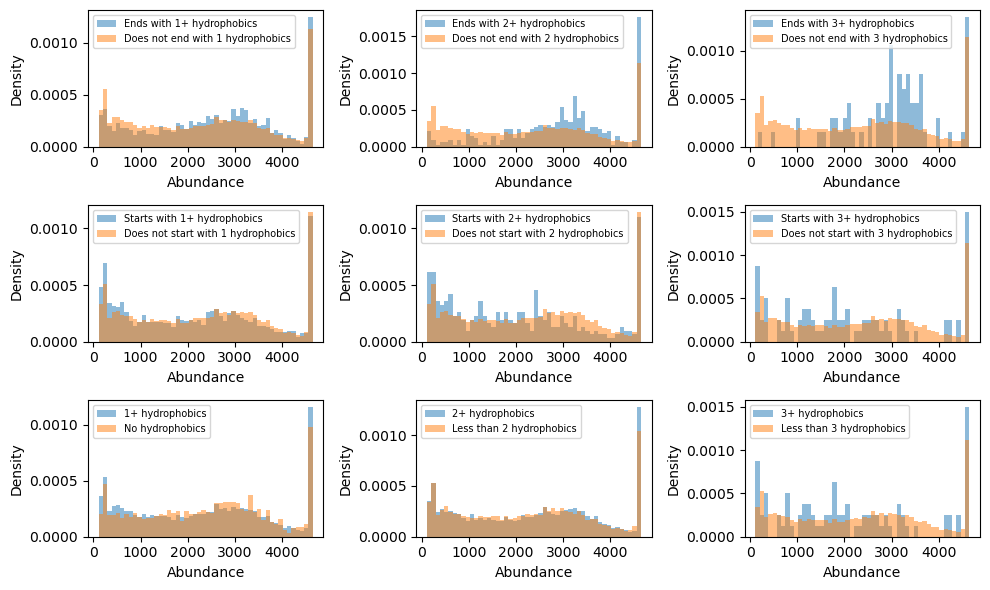

In [107]:
# plt.hist(file[file["hydrophobic_end"]]["Activity_cherryA"],bins=50, alpha=0.5, density=True)
fig, ax = plt.subplots(3,3,figsize=(10,6))
ax[0,0].hist(file[file["hydrophobic_end"]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="Ends with 1+ hydrophobics")
ax[0,0].hist(file[[ not i for i in file["hydrophobic_end"]]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="Does not end with 1 hydrophobics")
ax[0,0].set_xlabel("Abundance")
ax[0,0].set_ylabel("Density")
ax[0,0].legend(prop={'size': 7})

ax[0,1].hist(file[file["hydrophobic_2end"]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="Ends with 2+ hydrophobics")
ax[0,1].hist(file[[ not i for i in file["hydrophobic_end"]]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="Does not end with 2 hydrophobics")
ax[0,1].set_xlabel("Abundance")
ax[0,1].set_ylabel("Density")
ax[0,1].legend(prop={'size': 7})

ax[0,2].hist(file[file["hydrophobic_3end"]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="Ends with 3+ hydrophobics")
ax[0,2].hist(file[[ not i for i in file["hydrophobic_3end"]]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="Does not end with 3 hydrophobics")
ax[0,2].set_xlabel("Abundance")
ax[0,2].set_ylabel("Density")
ax[0,2].legend(prop={'size': 7})

ax[1,0].hist(file[file["hydrophobic_start"]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="Starts with 1+ hydrophobics")
ax[1,0].hist(file[[ not i for i in file["hydrophobic_start"]]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="Does not start with 1 hydrophobics")
ax[1,0].set_xlabel("Abundance")
ax[1,0].set_ylabel("Density")
ax[1,0].legend(prop={'size': 7})

ax[1,1].hist(file[file["hydrophobic_2start"]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="Starts with 2+ hydrophobics")
ax[1,1].hist(file[[ not i for i in file["hydrophobic_start"]]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="Does not start with 2 hydrophobics")
ax[1,1].set_xlabel("Abundance")
ax[1,1].set_ylabel("Density")
ax[1,1].legend(prop={'size': 7})

ax[1,2].hist(file[file["hydrophobic_3start"]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="Starts with 3+ hydrophobics")
ax[1,2].hist(file[[ not i for i in file["hydrophobic_3start"]]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="Does not start with 3 hydrophobics")
ax[1,2].set_xlabel("Abundance")
ax[1,2].set_ylabel("Density")
ax[1,2].legend(prop={'size': 7})

ax[2,0].hist(file[file["hydrophobic_anywhere"]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="1+ hydrophobics")
ax[2,0].hist(file[[ not i for i in file["hydrophobic_anywhere"]]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="No hydrophobics")
ax[2,0].set_xlabel("Abundance")
ax[2,0].set_ylabel("Density")
ax[2,0].legend(prop={'size': 7})

ax[2,1].hist(file[file["hydrophobic_2anywhere"]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="2+ hydrophobics")
ax[2,1].hist(file[[ not i for i in file["hydrophobic_2anywhere"]]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="Less than 2 hydrophobics")
ax[2,1].set_xlabel("Abundance")
ax[2,1].set_ylabel("Density")
ax[2,1].legend(prop={'size': 7})

ax[2,2].hist(file[file["hydrophobic_3start"]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="3+ hydrophobics")
ax[2,2].hist(file[[ not i for i in file["hydrophobic_3anywhere"]]]["Activity_cherryB"],bins=50, alpha=0.5, density=True, label="Less than 3 hydrophobics")
ax[2,2].set_xlabel("Abundance")
ax[2,2].set_ylabel("Density")
ax[2,2].legend(prop={'size': 7})

fig.tight_layout()

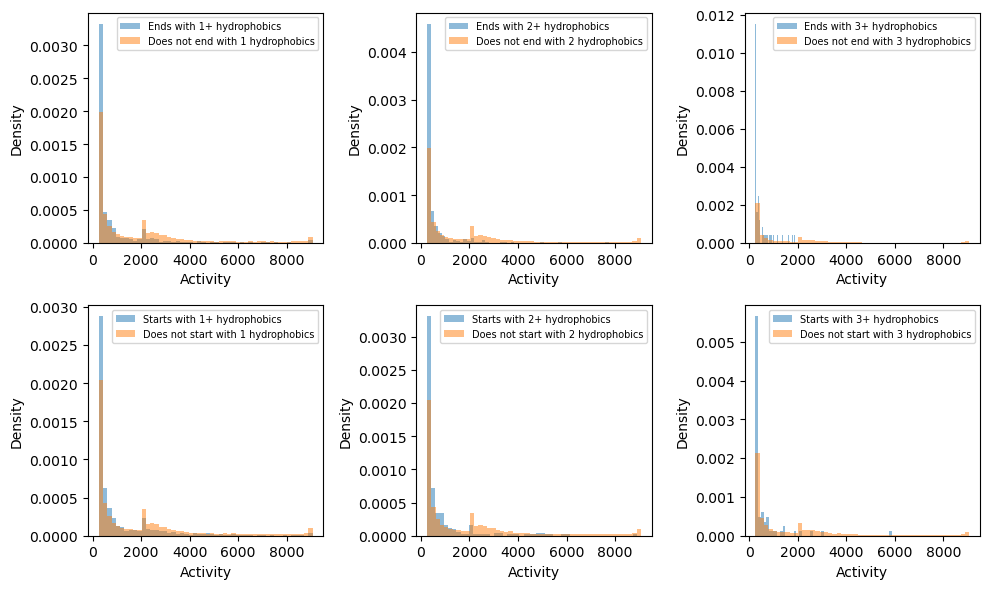

In [108]:
# plt.hist(file[file["hydrophobic_end"]]["Activity_cherryA"],bins=50, alpha=0.5, density=True)
fig, ax = plt.subplots(2,3,figsize=(10,6))
ax[0,0].hist(file[file["hydrophobic_end"]]["Activity_gfpB"],bins=50, alpha=0.5, density=True, label="Ends with 1+ hydrophobics")
ax[0,0].hist(file[[ not i for i in file["hydrophobic_end"]]]["Activity_gfpB"],bins=50, alpha=0.5, density=True, label="Does not end with 1 hydrophobics")
ax[0,0].set_xlabel("Activity")
ax[0,0].set_ylabel("Density")
ax[0,0].legend(prop={'size': 7})

ax[0,1].hist(file[file["hydrophobic_2end"]]["Activity_gfpB"],bins=50, alpha=0.5, density=True, label="Ends with 2+ hydrophobics")
ax[0,1].hist(file[[ not i for i in file["hydrophobic_end"]]]["Activity_gfpB"],bins=50, alpha=0.5, density=True, label="Does not end with 2 hydrophobics")
ax[0,1].set_xlabel("Activity")
ax[0,1].set_ylabel("Density")
ax[0,1].legend(prop={'size': 7})

ax[0,2].hist(file[file["hydrophobic_3end"]]["Activity_gfpB"],bins=50, alpha=0.5, density=True, label="Ends with 3+ hydrophobics")
ax[0,2].hist(file[[ not i for i in file["hydrophobic_3end"]]]["Activity_gfpB"],bins=50, alpha=0.5, density=True, label="Does not end with 3 hydrophobics")
ax[0,2].set_xlabel("Activity")
ax[0,2].set_ylabel("Density")
ax[0,2].legend(prop={'size': 7})

ax[1,0].hist(file[file["hydrophobic_start"]]["Activity_gfpB"],bins=50, alpha=0.5, density=True, label="Starts with 1+ hydrophobics")
ax[1,0].hist(file[[ not i for i in file["hydrophobic_start"]]]["Activity_gfpB"],bins=50, alpha=0.5, density=True, label="Does not start with 1 hydrophobics")
ax[1,0].set_xlabel("Activity")
ax[1,0].set_ylabel("Density")
ax[1,0].legend(prop={'size': 7})

ax[1,1].hist(file[file["hydrophobic_2start"]]["Activity_gfpB"],bins=50, alpha=0.5, density=True, label="Starts with 2+ hydrophobics")
ax[1,1].hist(file[[ not i for i in file["hydrophobic_start"]]]["Activity_gfpB"],bins=50, alpha=0.5, density=True, label="Does not start with 2 hydrophobics")
ax[1,1].set_xlabel("Activity")
ax[1,1].set_ylabel("Density")
ax[1,1].legend(prop={'size': 7})

ax[1,2].hist(file[file["hydrophobic_3start"]]["Activity_gfpB"],bins=50, alpha=0.5, density=True, label="Starts with 3+ hydrophobics")
ax[1,2].hist(file[[ not i for i in file["hydrophobic_3start"]]]["Activity_gfpB"],bins=50, alpha=0.5, density=True, label="Does not start with 3 hydrophobics")
ax[1,2].set_xlabel("Activity")
ax[1,2].set_ylabel("Density")
ax[1,2].legend(prop={'size': 7})

fig.tight_layout()

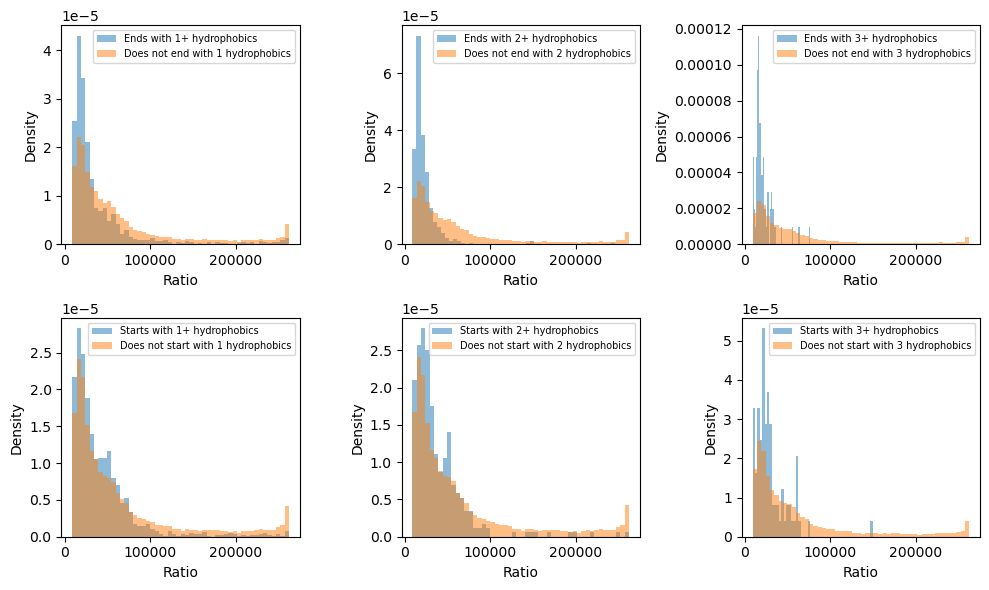

In [109]:
# plt.hist(file[file["hydrophobic_end"]]["Activity_cherryA"],bins=50, alpha=0.5, density=True)
fig, ax = plt.subplots(2,3,figsize=(10,6))
ax[0,0].hist(file[file["hydrophobic_end"]]["Activity_ratioB"],bins=50, alpha=0.5, density=True, label="Ends with 1+ hydrophobics")
ax[0,0].hist(file[[ not i for i in file["hydrophobic_end"]]]["Activity_ratioB"],bins=50, alpha=0.5, density=True, label="Does not end with 1 hydrophobics")
ax[0,0].set_xlabel("Ratio")
ax[0,0].set_ylabel("Density")
ax[0,0].legend(prop={'size': 7})

ax[0,1].hist(file[file["hydrophobic_2end"]]["Activity_ratioB"],bins=50, alpha=0.5, density=True, label="Ends with 2+ hydrophobics")
ax[0,1].hist(file[[ not i for i in file["hydrophobic_end"]]]["Activity_ratioB"],bins=50, alpha=0.5, density=True, label="Does not end with 2 hydrophobics")
ax[0,1].set_xlabel("Ratio")
ax[0,1].set_ylabel("Density")
ax[0,1].legend(prop={'size': 7})

ax[0,2].hist(file[file["hydrophobic_3end"]]["Activity_ratioB"],bins=50, alpha=0.5, density=True, label="Ends with 3+ hydrophobics")
ax[0,2].hist(file[[ not i for i in file["hydrophobic_3end"]]]["Activity_ratioB"],bins=50, alpha=0.5, density=True, label="Does not end with 3 hydrophobics")
ax[0,2].set_xlabel("Ratio")
ax[0,2].set_ylabel("Density")
ax[0,2].legend(prop={'size': 7})

ax[1,0].hist(file[file["hydrophobic_start"]]["Activity_ratioB"],bins=50, alpha=0.5, density=True, label="Starts with 1+ hydrophobics")
ax[1,0].hist(file[[ not i for i in file["hydrophobic_start"]]]["Activity_ratioB"],bins=50, alpha=0.5, density=True, label="Does not start with 1 hydrophobics")
ax[1,0].set_xlabel("Ratio")
ax[1,0].set_ylabel("Density")
ax[1,0].legend(prop={'size': 7})

ax[1,1].hist(file[file["hydrophobic_2start"]]["Activity_ratioB"],bins=50, alpha=0.5, density=True, label="Starts with 2+ hydrophobics")
ax[1,1].hist(file[[ not i for i in file["hydrophobic_start"]]]["Activity_ratioB"],bins=50, alpha=0.5, density=True, label="Does not start with 2 hydrophobics")
ax[1,1].set_xlabel("Ratio")
ax[1,1].set_ylabel("Density")
ax[1,1].legend(prop={'size': 7})

ax[1,2].hist(file[file["hydrophobic_3start"]]["Activity_ratioB"],bins=50, alpha=0.5, density=True, label="Starts with 3+ hydrophobics")
ax[1,2].hist(file[[ not i for i in file["hydrophobic_3start"]]]["Activity_ratioB"],bins=50, alpha=0.5, density=True, label="Does not start with 3 hydrophobics")
ax[1,2].set_xlabel("Ratio")
ax[1,2].set_ylabel("Density")
ax[1,2].legend(prop={'size': 7})

fig.tight_layout()

In [3]:
data = {'aa_seq': prot_seq, 'activity':activity, 'abundance':abundance}
df = pd.DataFrame(data).dropna()

In [8]:
df = df[df["abundance"] != max(df["abundance"])]

In [8]:
match = re.match(r'(.+)(\..+)', filename)

if match:
    filename_without_extension = match.group(1)
else:
    # Handle the case where there's no match (e.g., if the input is not a valid filename)
    filename_without_extension = None


In [10]:
df.to_csv(filename_without_extension + "_wrangled_no_max.csv",index=False)

In [6]:
import random


random.seed(1031)
index = [x for x in range(len(abundance))]
random.shuffle(index)

abundance = abundance[index]
activity = activity[index]


In [5]:
abundance[index]

8648      541.478562
2265     2145.161709
13205    1263.780086
11047    1001.835525
7489     2840.538806
            ...     
10289    2263.105807
1137     3109.370586
1294     3667.841383
18054     111.000000
18692    1236.753993
Length: 18965, dtype: float64

In [7]:
data = {'aa_seq': prot_seq, 'activity':activity, 'abundance':abundance}
df = pd.DataFrame(data).dropna()

In [9]:
df.to_csv(filename_without_extension + "_wrangled_both_shuffled.csv",index=False)